# TIME SERIES ANALYSIS PROJECT

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.Time series analysis can be applied to real-valued, continuous data, discrete numeric data, or discrete symbolic data.Time series are very frequently plotted via line charts. Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

**According to classical decomposition, a model is either taken to be a multiplicative model or an additive model as specified below.**

### Additive model

If yt is the time series value at time t. Tt, St, Ct, and Rt are the trend value, seasonal, cyclic and random fluctuations at time t respectively. According to the Additive Model, a time series can be expressed as

yt = Tt + St + Ct + Rt.

This model assumes that all four components of the time series act independently of each other.

### Multiplicative model



The multiplicative model assumes that the various components in a time series operate proportionately to each other. According to this model

yt = Tt × St × Ct × Rt

### Mixed models


Different assumptions lead to different combinations of additive and multiplicative models as

yt = Tt + St + Ct Rt.

The time series analysis can also be done using the model yt = Tt + St × Ct × Rt or yt = Tt × Ct + St × Rt etc.

**The different components in these models have been briefly explained below.**

### Trend

The trend shows the general tendency of the data to increase or decrease during a long period of time. A trend is a smooth, general, long-term, average tendency. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.
It is observable that the tendencies may increase, decrease or are stable in different sections of time.  But the overall trend must be upward, downward or stable. The population, agricultural production, items manufactured, number of births and deaths, number of industry or any factory, number of schools or colleges are some of its example showing some kind of tendencies of movement.

### Linear and Non-Linear Trend


If we plot the time series values on a graph in accordance with time t. The pattern of the data clustering shows the type of trend. If the set of data cluster more or less round a straight line, then the trend is linear otherwise it is non-linear 

### Periodic Fluctuations


There are some components in a time series which tend to repeat themselves over a certain period of time. They act in a regular spasmodic manner.

### Seasonal Variations


These are the rhythmic forces which operate in a regular and periodic manner over a span of less than a year. They have the same or almost the same pattern during a period of 12 months. This variation will be present in a time series if the data are recorded hourly, daily, weekly, quarterly, or monthly.
These variations come into play either because of the natural forces or man-made conventions. The various seasons or climatic conditions play an important role in seasonal variations. Such as production of crops depends on seasons, the sale of umbrella and raincoats in the rainy season, and the sale of electric fans and A.C. shoots up in summer seasons.
The effect of man-made conventions such as some festivals, customs, habits, fashions, and some occasions like marriage is easily noticeable.  They recur themselves year after year. An upswing in a season should not be taken as an indicator of better business conditions.

### Cyclic Variations


The variations in a time series which operate themselves over a span of more than one year are the cyclic variations. This oscillatory movement has a period of oscillation of more than a year. One complete period is a cycle. This cyclic movement is sometimes called the ‘Business Cycle’.

It is a four-phase cycle comprising of the phases of prosperity, recession, depression, and recovery. The cyclic variation may be regular are not periodic. The upswings and the downswings in business depend upon the joint nature of the economic forces and the interaction between them.

### Random or Irregular Movements


There is another factor which causes the variation in the variable under study. They are not regular variations and are purely random or irregular. These fluctuations are unforeseen, uncontrollable, unpredictable, and are erratic. These forces are earthquakes, wars, flood, famines, and any other disasters.

****

## -><u> Starting Out </u>

We start by importing the different modules/libraries required and making a class in python that will aloow us to easily analyse the data.

In [1]:
# Importing different libraries and modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller


In [2]:
# Make a class TS for some easy analysis of trend, cyclic nature and seasonality
class TS:
    '''
    Class that implements the various time series analysis methods as given in FAS and kendall.
    '''
    def __init__(self, data_loc, csv = True):
        '''
        Initializes object with a dataset. Index gets changed to datetime type too. 
        '''
        if csv : 
            data = pd.read_csv(data_loc)
        else:
            data = pd.read_excel(data_loc)
        data.set_index('dt', inplace= True)
        data.index = pd.to_datetime(data.index)
        self.data = data
        
    def make_train_test(self, train_ratio=0.8, subset = False):
        '''
        Makes training and test sets using the train_ratio. Making sub = True will making it split only the subset into training
        and test by making the self.sub the training data and self.test the test data.
        '''
        if subset:
            data = self.sub
        else:
            data = self.data
            
        train_n = int(train_ratio* data.shape[0])
        test_n = int((1-train_ratio)* data.shape[0])
        train = data.iloc[-train_n:] # because data isnt sorted in ascending order by index
        test = data.iloc[:-train_n]
        self.train_ratio = train_ratio
        self.test_ratio = 1 - train_ratio
        self.sub = train
        self.test = test
    
    def set_start_end(self, start, end=None):
        '''
        If lots of operations are being done to a subset of data, this method can be used to build a subset of data that 
        can be operated on. Using subset = True in following methods will allow class to use this subset dataset.
        '''
        if end:
            self.sub = self.data.loc[end:start].copy()
        else:
            self.sub = self.data.loc[:start].copy()
        
    def plot_data(self, col, start = None, end = None, figsize = (12,6), subset = False, color = None):
        '''
        Plot the data for a particular column(s) with index(datetime) on x-axis.
        '''
        if subset:
            sub = self.sub[col]
        else:
            if end:
                sub = self.data[col].loc[end:start]
            else:
                sub = self.data[col].loc[:start]
        fig, ax = plt.subplots(1,1, figsize = figsize)
        sub.plot(ax = ax, colors = color)
    
    def trend(self, col, method, subset = False, period = 5):
        '''
        Use different methods for trend analysis to get values of trend. Note: Should ideally use matrix methods to solve these 
        equations.

        '''
        if subset:
            data = self.sub.sort_index().copy()
        else:
            data = self.data.sort_index().copy()
        
        data['t'] = data.time - data.time.median()
        data = data[[col, 't']]
        
        sigma_y_t = np.dot(data.t, data[col])
        y_bar = data[col].mean()
        t_bar = data.t.mean()
        n = data.shape[0]
        sigma_y_square = np.sum(np.square(data[col]))
        sigma_t_square = np.sum(np.square(data.t))
        
        if method == 'straight line':
            b = (sigma_y_t - n*y_bar*t_bar)/(sigma_t_square - n*(t_bar)**2)
            a = y_bar - b*t_bar
            
            data['trend'] = a + b*data.t
            self.data['straight_line_trend'] = data['trend'] 
            if subset:
                self.sub['straight_line_trend'] = data['trend']
                
        elif method == 'parabolic':
            sigma_y_t_square = np.dot(np.square(data.t), data[col])
            sigma_t_four = np.sum(data.t**4)
            sigma_t_cube = np.sum(data.t**3)
            
            mini_denom = sigma_t_square-n*t_bar**2
            num = sigma_y_t_square - y_bar*sigma_t_square + (n*t_bar*y_bar-sigma_y_t)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            denom = (-1*sigma_t_square**2)/n + sigma_t_four - (-t_bar*sigma_t_square + sigma_t_cube)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            c = num/denom
            b = (sigma_y_t-n*y_bar*t_bar-c*(-t_bar*sigma_t_square+sigma_t_cube))/mini_denom
            a = y_bar - b*t_bar - c*sigma_t_square/n
            
            data['trend'] = a + b*data.t + c*data.t**2
            self.data['parabolic_trend'] = data['trend'] 
            if subset:
                self.sub['parabolic_trend'] = data['trend']
                
        elif method == 'exponential':
            data[col] = np.log(data[col])
            
            sigma_y_t = np.dot(data.t, data[col])
            y_bar = data[col].mean()
            t_bar = data.t.mean()
            n = data.shape[0]
            sigma_y_square = np.sum(np.square(data[col]))
            sigma_t_square = np.sum(np.square(data.t))
            
            B = (sigma_y_t - n*y_bar*t_bar)/(sigma_t_square - n*(t_bar)**2)
            A = y_bar - B*t_bar
            
            data['trend'] = np.exp(A + B*data.t)
            self.data['exponential_trend'] = data['trend'] 
            if subset:
                self.sub['exponential_trend'] = data['trend']
            
        elif method == '2_deg_log':
            data[col] = np.log(data[col])
            
            sigma_y_t = np.dot(data.t, data[col])
            y_bar = data[col].mean()
            t_bar = data.t.mean()
            n = data.shape[0]
            sigma_y_square = np.sum(np.square(data[col]))
            sigma_t_square = np.sum(np.square(data.t))
            
            sigma_y_t_square = np.dot(np.square(data.t), data[col])
            sigma_t_four = np.sum(data.t**4)
            sigma_t_cube = np.sum(data.t**3)
            
            mini_denom = sigma_t_square-n*t_bar**2
            num = sigma_y_t_square - y_bar*sigma_t_square + (n*t_bar*y_bar-sigma_y_t)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            denom = (-1*sigma_t_square**2)/n + sigma_t_four - (-t_bar*sigma_t_square + sigma_t_cube)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            C = num/denom
            B = (sigma_y_t-n*y_bar*t_bar-C*(-t_bar*sigma_t_square+sigma_t_cube))/mini_denom
            A = y_bar - B*t_bar - C*sigma_t_square/n
            
            data['trend'] = np.exp(A + B*data.t + C*data.t**2)
            self.data['2_deg_log_trend'] = data['trend']
            if subset:
                self.sub['2_deg_log_trend'] = data['trend']
        
        elif method=='modified exponential':
            # solved using the method of partial sums
            
            # make sure data can be divided into 3 equal parts
            remainder = data.shape[0]%3
            n = data.shape[0]-remainder
            
            cd= int(n/3) # cd = common_divisor because this will be used a lot in the below formulae 
            data = data.iloc[remainder:]
            data['t'] = range(1,n+1)
            s1 = data.iloc[:cd][col].sum()
            s2 = data.iloc[cd:2*cd][col].sum()
            s3 = data.iloc[2*cd:][col].sum()
            c = ((s3-s2)/(s2-s1))**(1/cd)
            b =  ((c-1)*(s2-s1)**3)/(c*(s3-2*s2+s1)**2)
            a = (s1-b*c*(c**cd-1)/(c-1))/cd
            
            data['trend'] = a + b*(c**data['t'])
            self.data['modified_exponential_trend'] = data['trend']
            if subset:
                self.sub['modified_exponential_trend'] = data['trend']
                
        elif method == "gompertz":
            data[col] = np.log(data[col])
            # same as above implementation
            remainder = data.shape[0]%3
            n = data.shape[0]-remainder
                            
            cd= int(n/3) # cd = common_divisor because this will be used a lot in the below formulae 
            data = data.iloc[remainder:]
            data['t'] = range(1,n+1)
            s1 = data.iloc[:cd][col].sum()
            s2 = data.iloc[cd:2*cd][col].sum()
            s3 = data.iloc[2*cd:][col].sum()
            c = ((s3-s2)/(s2-s1))**(1/cd)
            b =  ((c-1)*(s2-s1)**3)/(c*(s3-2*s2+s1)**2)
            a = (s1-b*c*(c**cd-1)/(c-1))/cd
            
            data['trend'] = np.exp(a + b*(c**data['t']))
            self.data['gompertz_trend'] = data['trend']
            if subset:
                self.sub['gompertz_trend'] = data['trend']
                
        elif method == "ma":
            shift_by = int(-(period-1)/2)
            if period%2!=0:
                data['trend'] = data[col].rolling(window = period).mean().shift(shift_by)
            else:
                # centering the moving averages
                data['trend'] = data[col].rolling(window = period).mean().shift(shift_by).rolling(window = 2).mean().shift(shift_by)
            self.data['ma_trend'] = data['trend']
            if subset:
                self.sub['ma_trend'] = data['trend']
                
        elif method== "logistic" :
            # partial sums implementation
            
            data[col] = 1/data[col]
            remainder = data.shape[0]%3
            n = data.shape[0]-remainder
                            
            cd= int(n/3) # cd = common_divisor because this will be used a lot in the below formulae 
            data = data.iloc[remainder:]
            data['t'] = range(1,n+1)
            s1 = data.iloc[:cd][col].sum()
            s2 = data.iloc[cd:2*cd][col].sum()
            s3 = data.iloc[2*cd:][col].sum()
            c = ((s3-s2)/(s2-s1))**(1/cd)
            b =  ((c-1)*(s2-s1)**3)/(c*(s3-2*s2+s1)**2)
            a = (s1-b*c*(c**cd-1)/(c-1))/cd
            
            data['trend'] = 1/(a + b*(c**data['t']))
            self.data['logistic_trend'] = data['trend']
            if subset:
                self.sub['logistic_trend'] = data['trend']
                
    def seasonality(self, col, method, trend, subset = False):
        '''
        Use different methods for seasonality analysis to get values of estimated seasonality.
        '''
        if not subset :
            data = self.data.copy()
        else:
            data = self.sub.copy()
            
        if method == 'ratio to ma':
            if 'ma_trend' not in self.data.columns:
                return "Please use ma in trend to make ma_trend first"
            else:
                print("Warning: Make sure the column being used here and the one with the moving average is the same")
                data["seasonality"] = data[col]/data["ma_trend"] * 100
                data["hour"] = data.index.hour
                seasonality = data.groupby("hour").median()["seasonality"] 
                s_sum = seasonality.sum()
                self.seasonal = seasonality * 2400/s_sum
                
        elif method == 'link relative':
            # computing link relatives
            data['lr'] = data[col]/data[col].shift(-1) * 100
            # averaging over hour
            data['hour'] = data.index.hour
            lr_avg = data.groupby('hour').median()['lr']
            # computing chain relatives
            cr = 100
            saved_val = lr_avg.iloc[0]
            lr_avg.iloc[0] = 100
            for i in range(1, lr_avg.shape[0]):
                lr_avg.iloc[i] = lr_avg.iloc[i] * cr /100
                cr = lr_avg.iloc[i]
            # computing corrected chain relatives
            new_cr = saved_val * cr/100
            d = (new_cr-100)/24
            lr_avg.iloc[0] = saved_val
            for i in range(1, lr_avg.shape[0]):
                lr_avg.iloc[i] = lr_avg.iloc[i] - (i*d)
            # computing seasonal indices
            mean_corrected = lr_avg.mean()
            self.seasonal = lr_avg/mean_corrected * 100
            self.seasonal.name = 'seasonality'
            
        elif method == 'simple averages' :   
            data['hour'] = data.index.hour
            sa_avg= data.groupby('hour').mean()[col]
            avg = sa_avg.mean()
            self.seasonal = (sa_avg/avg) * 100
            self.seasonal.name = 'seasonality'

        
        elif method == 'ratio to trend' :
            data['rt']= (data[col]/ data[trend])*100
            data['hour']= data.index.hour
            rt_avg= data.groupby('hour').mean()['rt']
            sum_ = rt_avg.sum()
            self.seasonal = rt_avg * 2400/sum_
            self.seasonal.name = 'seasonality'

        print("---Check self.seasonal---")    
        
    def deseasonalize(self, col, subset = False):
        '''
        Deseasonalize the data according to the seasonality method used when forming self.seasonal.
        '''
        if not subset:
            data = self.data.copy()
        else:
            data = self.sub.copy()
        data['hour'] = data.index.hour
        data = data.reset_index()
        new = pd.merge(data, self.seasonal.reset_index(), on='hour')
        new['deseasonalized_' + col] = new[col]/new['seasonality'] * 100
        new= new.sort_values('dt', ascending = False)
        new.index = new['dt']
        self.data['deseasonalized_' + col] = new['deseasonalized_' + col]
        if subset:
            self.sub['deseasonalized_' + col] = new['deseasonalized_' + col]
    
    def cyclic(self, col, trend, method = 'residual', subset=False, period = 101):
        '''
        Find out the cyclic component in the data. Warning: Trend and seasonality must be calculated before using residual method.
        '''
        if method =='residual':
            if not subset:
                data = self.data.copy()
            else:
                data = self.sub.copy()
            data['cyclic'] = data['deseasonalized_' + col]/(data[trend + '_trend']) * 100
            
            shift_by = -period//2
            data['cyclic'] = data['cyclic'].sort_index().rolling(window = period).mean().shift(shift_by) # to remove the random component
            self.data['cyclic'] = data['cyclic']
            if subset: 
                self.sub['cyclic'] = data['cyclic']
            print('---Chk self.data/sub for cyclic column---')

We first load the data.

In [3]:
# loading data (Ishan)
ltc = TS(data_loc= r'../../Desktop/TS/btc.csv', csv = True)

In [4]:
# # loading data ( Nilakshi )
# ltc = TS(data_loc= r'F:\Academic\Projects\TS Project\btc.xlsx', csv = False)

We have taken the 2019 data to work on

In [7]:
# making a subset of data to work on 
ltc.set_start_end(start = '2019', end= '2019')

We split the data into train and test using 90% of the data as train and 10% of the data is test data which we will forecast for.

In [6]:
ltc.make_train_test(train_ratio = 0.9, subset = True)

****

## -><u>Trend Analysis</u>

We start our analysis by analysing the trend of the data and selecting a suitable curve to understand the movement of the data.

In [17]:
# calculating trend values
trends = ['straight line', 'parabolic','exponential','2_deg_log', 'modified exponential', 'gompertz','logistic']
for i in trends :
    ltc.trend(col = 'open', method = i, subset = True)

In [18]:
# Taking the order of moving average as: 24*7+1 to see how the trend fits
ltc.trend(col = 'open', method = "ma", subset = True, period = 169)

In [19]:
# checking subset(train) dataframe
ltc.sub.head()

close      high       low      open        time  \
dt                                                                              
2019-09-07 00:00:00+00:00  10340.02  10360.73  10304.22  10309.91  1567814400   
2019-09-06 23:00:00+00:00  10309.91  10359.45  10299.93  10346.23  1567810800   
2019-09-06 22:00:00+00:00  10346.23  10427.42  10344.37  10426.59  1567807200   
2019-09-06 21:00:00+00:00  10426.59  10428.75  10315.63  10363.72  1567803600   
2019-09-06 20:00:00+00:00  10363.72  10393.79  10228.17  10387.21  1567800000   

                           volumefrom     volumeto  year  straight_line_trend  \
dt                                                                              
2019-09-07 00:00:00+00:00      703.52   7288191.22  2019         11749.620989   
2019-09-06 23:00:00+00:00     1214.25  12546098.21  2019         11748.003657   
2019-09-06 22:00:00+00:00     1475.83  15334847.53  2019         11746.386325   
2019-09-06 21:00:00+00:00     1512.12  15686657.61  2019         11744.768993   
2019-09-06 20:00:00+00:00     5267.52  54174196.71  2019         11743.151661   

                           parabolic_trend  exponential_trend  \
dt                                                              
2019-09-07 00:00:00+00:00     12180.800783       13092.836260   
2019-09-06 23:00:00+00:00     12178.750540       13089.606512   
2019-09-06 22:00:00+00:00     12176.700441       13086.377561   
2019-09-06 21:00:00+00:00     12174.650487       13083.149407   
2019-09-06 20:00:00+00:00     12172.600679       13079.922048   

                           2_deg_log_trend  modified_exponential_trend  \
dt                                                                       
2019-09-07 00:00:00+00:00     12946.391696                13485.882552   
2019-09-06 23:00:00+00:00     12943.344245                13482.522491   
2019-09-06 22:00:00+00:00     12940.297463                13479.163235   
2019-09-06 21:00:00+00:00     12937.251349                13475.804784   
2019-09-06 20:00:00+00:00     12934.205903                13472.447137   

                           gompertz_trend  logistic_trend  ma_trend  
dt                                                                   
2019-09-07 00:00:00+00:00    13976.623114    14996.120539       NaN  
2019-09-06 23:00:00+00:00    13972.631283    14990.470099       NaN  
2019-09-06 22:00:00+00:00    13968.640717    14984.822939       NaN  
2019-09-06 21:00:00+00:00    13964.651416    14979.179055       NaN  
2019-09-06 20:00:00+00:00    13960.663379    14973.538445       NaN

Text(0, 0.5, 'Opening Price')

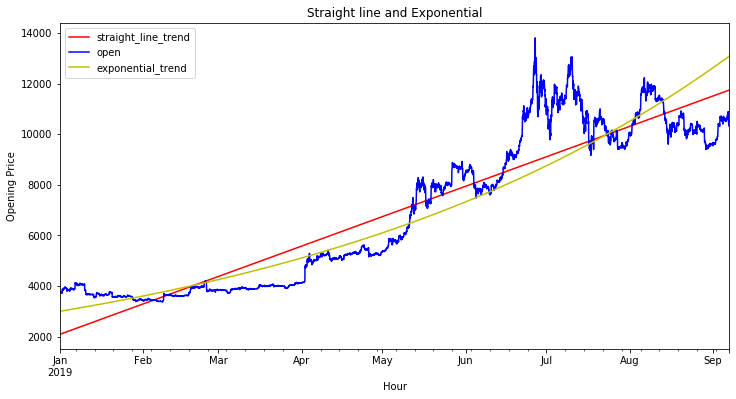

In [20]:
# plotting trend values with actual values
ltc.plot_data(col=['straight_line_trend','open' ,'exponential_trend'], subset =True,color = ('r','b','y'))
plt.title("Straight line and Exponential")
plt.xlabel("Hour")
plt.ylabel("Opening Price")

Text(0, 0.5, 'Opening Price')

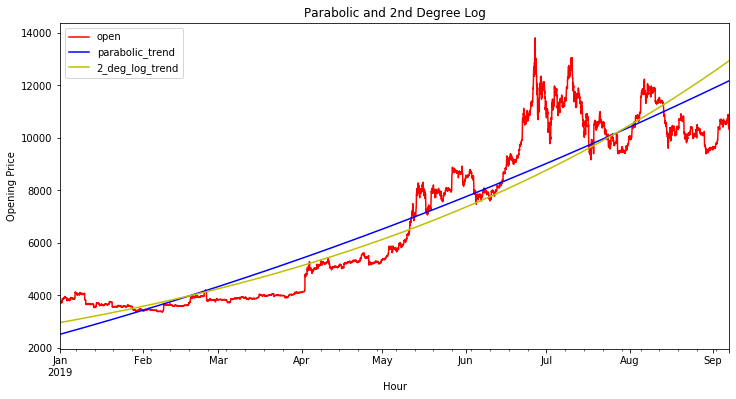

In [21]:
# plotting trend values with actual values
ltc.plot_data(col=['open','parabolic_trend', '2_deg_log_trend'], subset =True, color = ('r','b','y')) 
plt.title("Parabolic and 2nd Degree Log")
plt.xlabel("Hour")
plt.ylabel("Opening Price")

Text(0, 0.5, 'Opening Price')

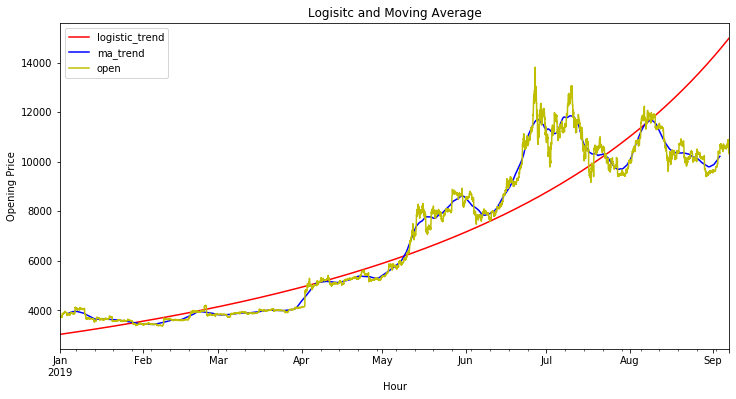

In [22]:
# plotting trend values with actual values
ltc.plot_data(col=['logistic_trend' ,'ma_trend', 'open'], subset =True,  color=['r','b','y'])
plt.title("Logisitc and Moving Average")
plt.xlabel("Hour")
plt.ylabel("Opening Price")

Text(0, 0.5, 'Opening Price')

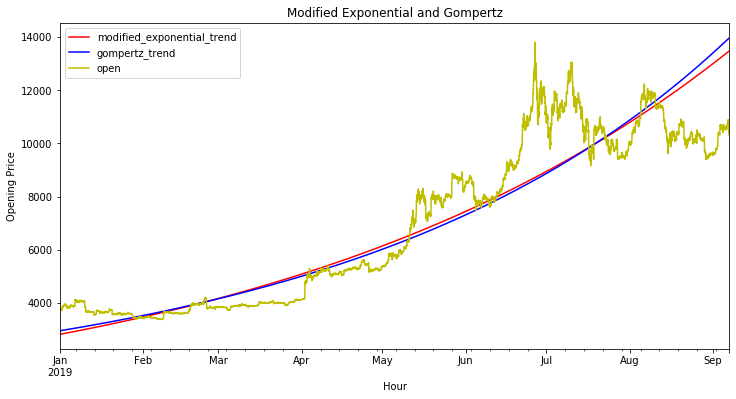

In [23]:
# plotting trend values with actual values
ltc.plot_data(col=['modified_exponential_trend','gompertz_trend', 'open'], subset =True, color=['r','b','y'])
plt.title("Modified Exponential and Gompertz")
plt.xlabel("Hour")
plt.ylabel("Opening Price")

#### Upon visual examination, we see the pretty obvious result, the moving average fits best to the data. However, to determine the best trend we perform the following two steps:
1. Determine an appropriate moving average extend/order. One that doesn't overfit or underfit the data.
2. Calculate MSE(Mean Squared Error) for all the trends to see which one fits best.

## -><u>Moving average : Order determination</u>

To determine the order of the moving average, we plot it with the opening price iteratively over the range 51 to 1500 with intervals of 100. Meaning we compute the moving average for extents: 51, 151, 251.....1351, 1451 and then select the best one visually.

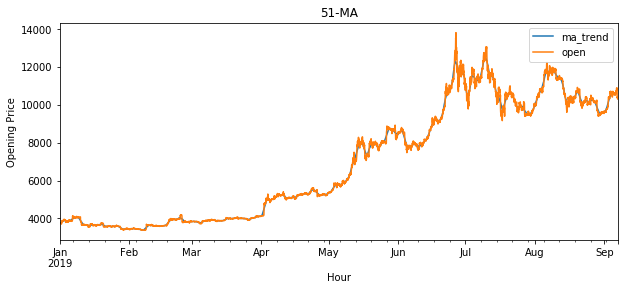

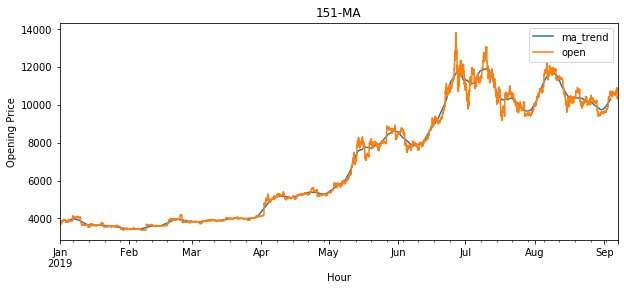

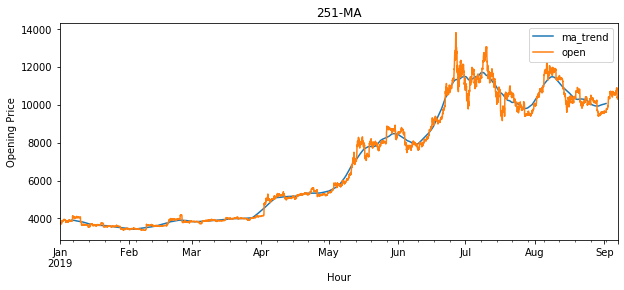

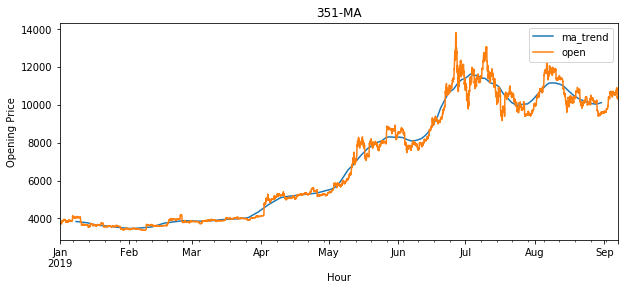

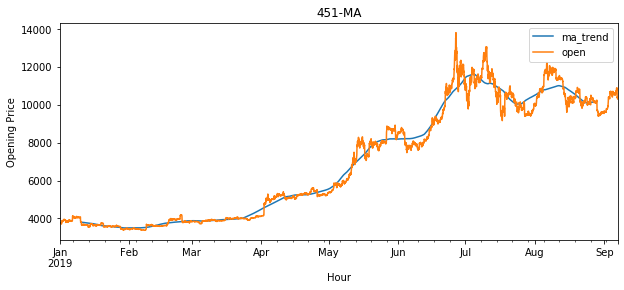

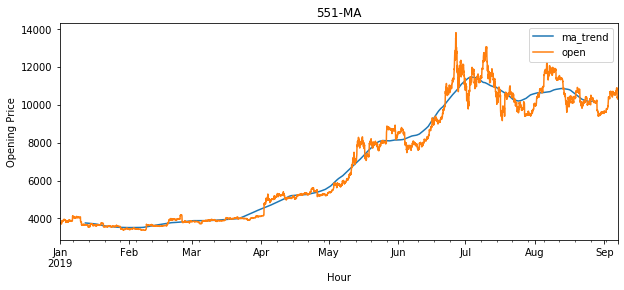

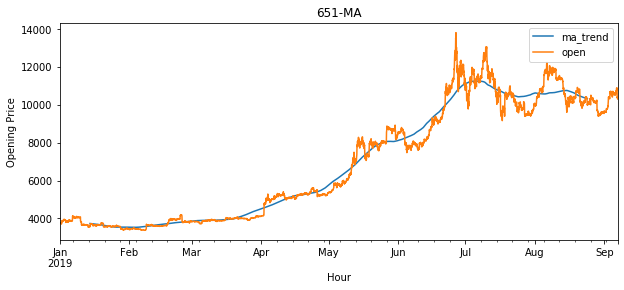

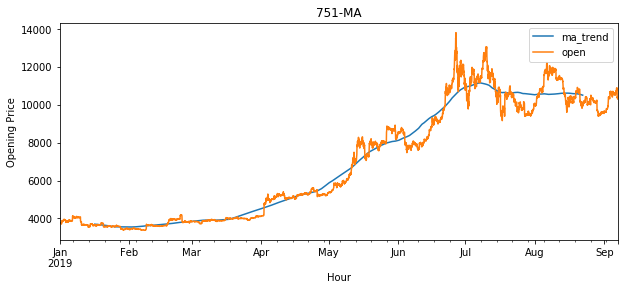

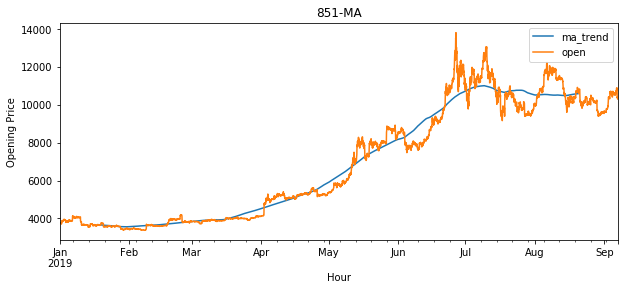

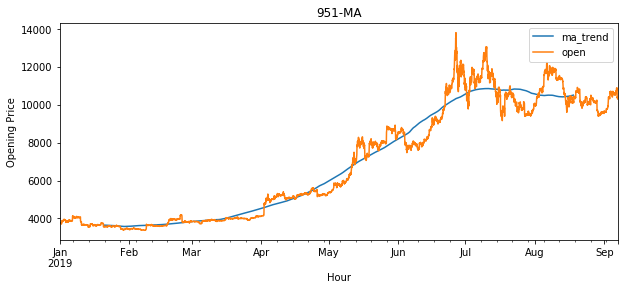

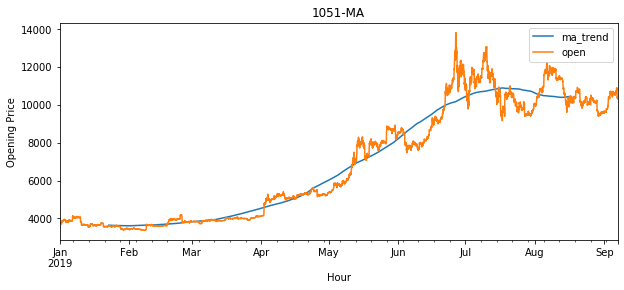

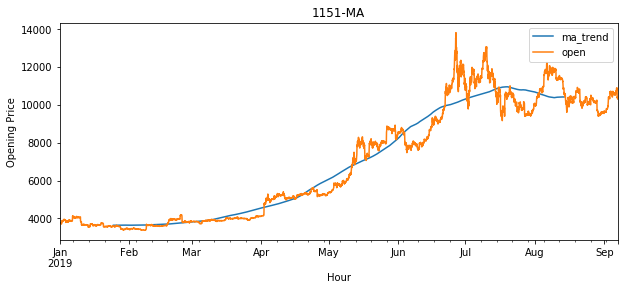

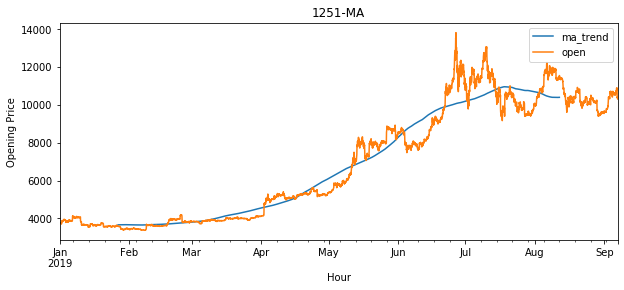

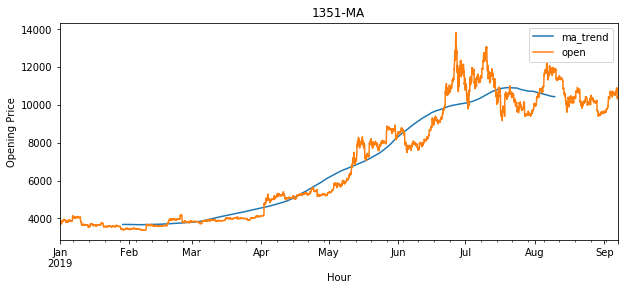

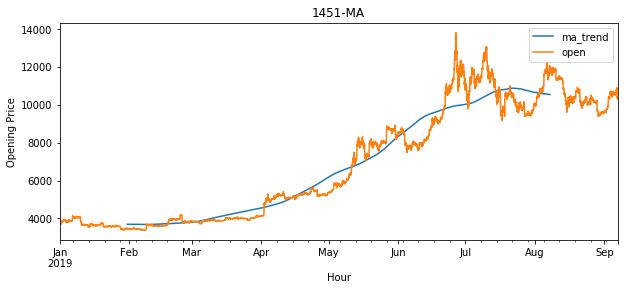

In [32]:
for i in range(51,1500,100):
    ltc.trend(col = 'open', method = "ma", subset = True, period = i)
    ltc.plot_data(col=['ma_trend', 'open'], subset =True, figsize = (10,4))
    plt.title(str(i)+'-MA')
    plt.xlabel('Hour')
    plt.ylabel('Opening Price')

#### On examining the graphs, we note the following:
* 51-MA to 351-MA more or less overfit the data and catch even very small fluctuations
* 451-MA to 651-MA are smoother and neither overfit nor underfit
* 751-MA onwards we have loss of quite a lot of values at the start and end of the series. The trend line keeps getting straighter as we increase the order. 1051-MA onwards we have a lot of values lost and thus won't be considering them.

#### Thus, just on the basis of visual examination, we see the <u>651-MA</u> to be a really good fit to the data without overfitting it and without losing too many values.

In [36]:
ltc.trend(col = 'open', method = "ma", subset = True, period = 651)

Text(0, 0.5, 'Opening Price')

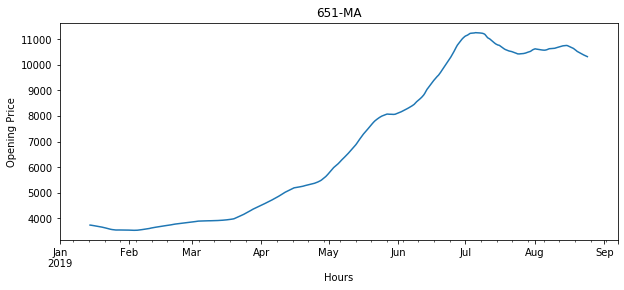

In [41]:
ltc.sub.ma_trend.plot(figsize = (10,4))
plt.title("651-MA")
plt.xlabel("Hours")
plt.ylabel("Opening Price")

## -><u>Choosing between Moving Average vs other Trend Curves</u>

Now to choose between the moving average and the other trend curves and to select the most appropriate we could either visually examine or select the one with the least MSE(Mean Squared Error).  Visually, it is clear that moving average fits the data the best. 

In [55]:
# We write a loop to calculate the MSE for all curves
trends = ['straight_line', 'parabolic','exponential','2_deg_log', 'modified_exponential', 'gompertz','logistic', 'ma']
mse_dict = dict()
for i in trends:
    trend = i+'_trend'
    sub = ltc.sub.dropna(axis=0, subset = [trend])
    mse_dict[trend] = round(mse(sub['open'], sub[trend]))

In [56]:
# the dictionary showing mse against the trends
mse_dict

{'straight_line_trend': 1245553.0,
 'parabolic_trend': 1208332.0,
 'exponential_trend': 1443590.0,
 '2_deg_log_trend': 1396729.0,
 'modified_exponential_trend': 1485542.0,
 'gompertz_trend': 1688199.0,
 'logistic_trend': 2163910.0,
 'ma_trend': 237977.0}

In [57]:
# Choosing the best suited trend
inv_dict = dict()
for i,j in mse_dict.items():
    inv_dict[j] = i
print("The best suited trend for this data is :", inv_dict[sorted(inv_dict)[0]])

The best suited trend for this data is : ma_trend


In [58]:
print("The best suited trend apart from moving average is :", inv_dict[sorted(inv_dict)[1]])

The best suited trend apart from moving average is : parabolic_trend


#### Thus, we get the two best trends for our training data as: 
1. 651-MA trend curve
2. Parabolic trend curve

****

## -> <u>Seasonality</u>

We will be implementing some seasonaity techniques to see if there is hourly seasonality in our data. Then we will be using some python packages to study seasonality and decompose our data a little. 

1. Ratio to moving average

In [82]:
ltc.trend(col = 'open', method = "ma", subset = True, period = 651)

In [83]:
ltc.seasonality(col = 'open', method = 'ratio to ma',trend= 'ma_trend' ,subset = True)

---Check self.seasonal---


Text(0.5, 1.0, 'Ratio to Moving Average')

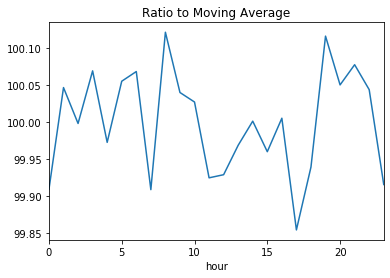

In [84]:
ltc.seasonal.plot()
plt.title("Ratio to Moving Average")

2. Link Relative

In [85]:
ltc.seasonality(col='open', method = 'link relative', trend= None, subset = True)

---Check self.seasonal---


Text(0.5, 1.0, 'Link Relative')

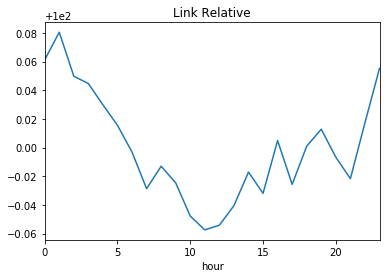

In [86]:
ltc.seasonal.plot()
plt.title("Link Relative")

3. Method Of Simple Averages

In [87]:
ltc.seasonality(col = 'open', method = 'simple averages',trend = None, subset = True)

---Check self.seasonal---


Text(0.5, 1.0, 'Simple Averages')

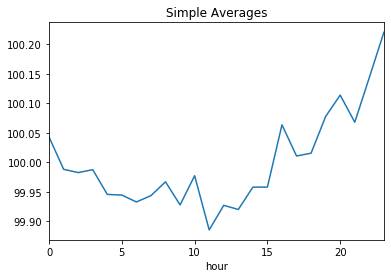

In [88]:
ltc.seasonal.plot()
plt.title("Simple Averages")

4. Ratio to trend

In [89]:
ltc.trend(col = 'open', method = "parabolic", subset = True)

In [90]:
ltc.seasonality(col='open', method = 'ratio to trend',trend='parabolic_trend', subset = True)

---Check self.seasonal---


Text(0.5, 1.0, 'Ratio to Trend')

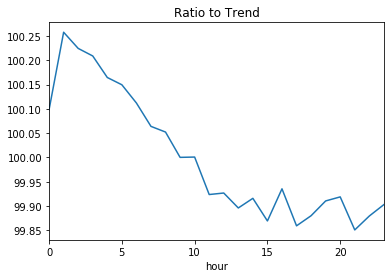

In [91]:
ltc.seasonal.plot()
plt.title("Ratio to Trend")

We see for all the above that hourly seasonality doesn't exist. It is very negligible. The seasonality peaks max to about 0.25% when we use simple averages. 

#### Thus now we try to explore seasonality a little more using python packages that allow us to decompose the data.

## -> <u>Decomposition</u>

We try to decompose the data using the python function "seasonal_decompose" in statsmodels that allows us to specify the type of model(additive/multiplicative) along with the frequency of the data we want to compute seasonality for. This method also implements classicial decomposition and ideally X11, SEATS or STL is preferred.

Figure(432x288)


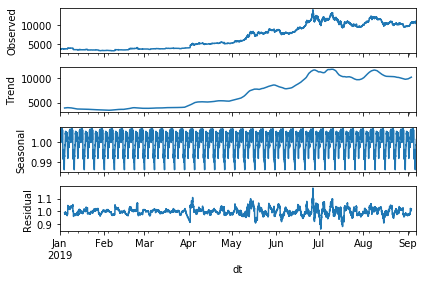

In [93]:
# We will let the model be multiplicative
result = seasonal_decompose(ltc.sub.open, model='multiplicative', freq = 24*7)
print(result.plot())

Here we see the freq = 24 * 7 meaning we consider each week to be a season and thus all weeks to have the same seasonality. 

However we also note that seasonality increases/decreases by 1% which is too less. Thus the data can be said to not have significant seasonality just as our above methods showed.

Text(0.5, 1.0, 'Residual')

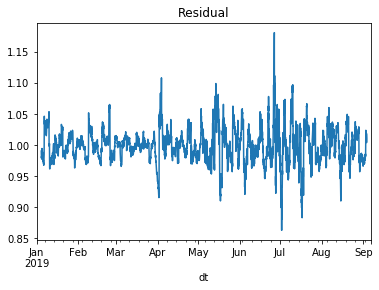

In [94]:
result.resid.plot()
plt.title("Residual")

 We also see the remainder variable having a heteroskedastic nature. The variance of the remainder increases with time. This remainder is made up of the cyclic element along with the error/random component. Thus we must check out the cyclic nature of the data. But since we have only data for under an year, we can't explore cyclic variations in the traditional sense.

## -><u>Deseasonalize</u>

#### In view of the above analysis, this doesn't really make sense. We have still implmented it. Also because we need the deseasonalized column to do cyclic nature analysis below.

In [95]:
ltc.seasonality(col = 'open', method = 'ratio to moving average', trend = None, subset = True)

---Check self.seasonal---


In [96]:
ltc.deseasonalize('open',subset = True)

Text(0.5, 1.0, 'Deseasonlized Data')

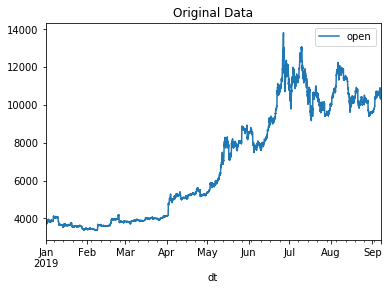

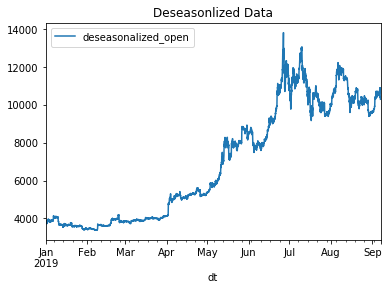

In [97]:
ltc.sub[['open']].plot()
plt.title('Original Data')
ltc.sub[['deseasonalized_open']].plot()
plt.title("Deseasonlized Data")

As was expected, we see that there is negligible difference between our original data and our deseasonlized data.

****

## -> <u>Cyclic Component</u>

#### As we don't have data for more than an year, we can't really study the cyclic nature of the data. But we still implement the method keeping in mind that we have hourly data for about 7 months. 

To check out the cyclic nature, we must have deseasonlized implmented above.

In [98]:
ltc.cyclic('open', trend = 'ma', subset = True, period = 129)

---Chk self.data/sub for cyclic column---


Text(0, 0.5, 'Opening Price')

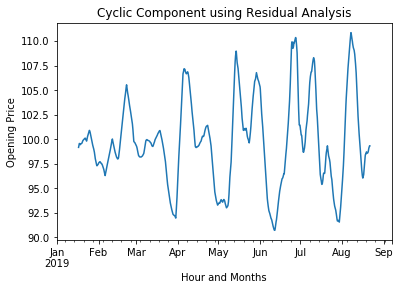

In [99]:
ltc.sub.cyclic.plot()
plt.title("Cyclic Component using Residual Analysis")
plt.xlabel('Hour and Months')
plt.ylabel('Opening Price')

Here we see an analysis very similar to when we used the "seasonal_decompose" function of statsmodels of python. The component increases with time and with months. This is true as our data has a lot of variation towards July and August. 

The period 129 above has been selected after trying out various other periods. This is the period over which we used the moving average to smooth out the random component.

This is more a graph of our random component movement than our cyclic component atleast for now. To comment on whether it shows our cyclic component we can try and include past data and see if something new is found out. 

**However, if we include some past data to study this:**

Consider the data starting from 2017 January till the end of our training dataset

In [ ]:
end = ltc.sub.index.max()

Text(0, 0.5, 'Opening Price')

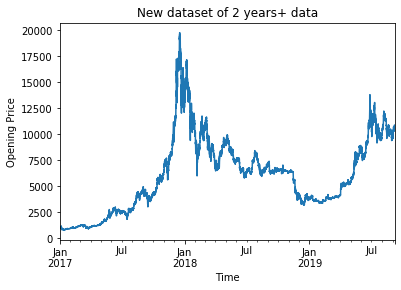

In [117]:
ltc.set_start_end('2017',end)
ltc.sub.open.plot()
plt.title('New dataset of 2 years+ data')
plt.xlabel('Time')
plt.ylabel('Opening Price')

To calculate cyclic component for this data we need:
1. Moving average : Trend
2. Ratio to moving average : Seasonality
3. Residual analysis : Cyclic component

In [131]:
ltc.trend('open','ma', subset = True, period = 651)

Text(0.5, 1.0, 'Opening prices followed by 651-MA')

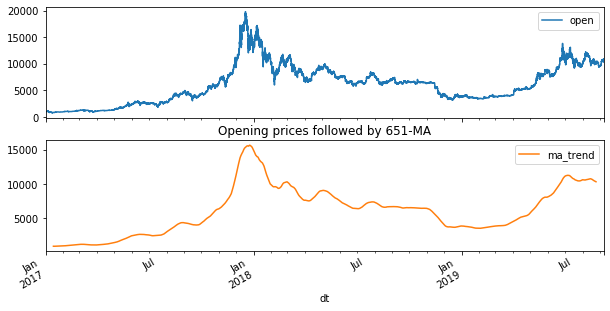

In [192]:
ltc.sub[['open', 'ma_trend']].plot(subplots = True, figsize = (10,5))
plt.title("Opening prices followed by 651-MA")

In [142]:
ltc.seasonality('open', 'ratio to ma', 'ma_trend', subset = True)

---Check self.seasonal---


Text(0, 0.5, 'Seasonal Indices')

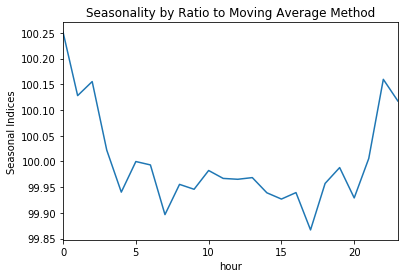

In [193]:
ltc.seasonal.plot()
plt.title("Seasonality by Ratio to Moving Average Method")
plt.ylabel("Seasonal Indices")

In [144]:
ltc.deseasonalize('open', subset = True)

In [188]:
ltc.cyclic('open', 'ma',subset = True, period =101)

---Chk self.data/sub for cyclic column---


Text(0.5, 1.0, 'Cyclic Nature')

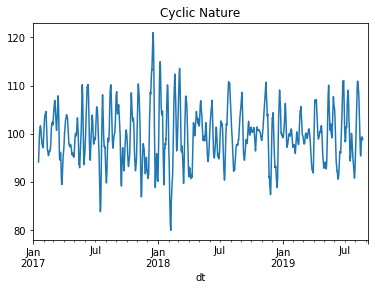

In [194]:
ltc.sub.cyclic.plot()
plt.title("Cyclic Nature")

From the given graph, we concluded that it is difficult to see if a cyclic component exists as there is too much of fluctuaion of prices. There was a period of really high prices around Nov-Dec 2018 followed by a huge dip around Feb 2018. This is probably one of the only main defining period. After this period we see fluctuations decreaseing and then increasing a little around Oct-Dec 2019 where we see a major fall in the prices. Fluctuations then reduced for some time but started increasing again with time. 

There is a strong random component related with our data of this we can be sure which keeps changing its variance. As the bitcoin, and cryptocurrencies in general, had a time when there was too much of hype around it, naturally there were periods of strong inflation of prices due to market sentiment and hype. But as it fell, so did the prices of the bitcoin which explains the dips followed by huge peaks. 

Also a lot of governments have banned trade of cryptocurrencies. This obviously affects market snetiment a lot. There will probably come a time when this fluctuation will settle around a price and then keep increasing or decreasing as cryptocurrencies get more acceptance or rejection. 

****

## -><u> Forecasting </u>

#### Now we will start forecasting. For forecasting we will be using two main classes: 
1. Statistical Models
    * Simple Exponential Smoothing
    * Holts Linear Trend
    * Arima
2. Machine learning Models
    * Random Forest Regressor
    * Support Vector Regressor
    
#### We will be optimizing for each model its parameters by considering either of the below metrics by fitting on the training dataset and forecasting on the test dataset :
* AIC
* Mean Squared Error

#### After optimizing the parameters for each model, we will choose the best by comparing their MSE on the test dataset. 

## -><u> Checking out the train and test datasets </u>

Text(0.5, 1.0, 'Train and Test Data')

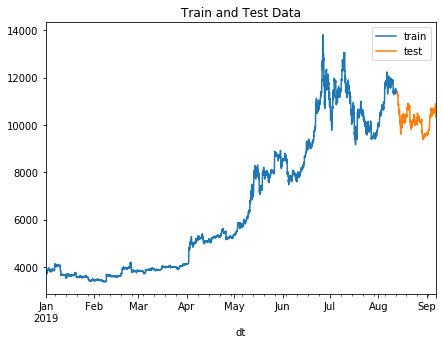

In [13]:
train = ltc.sub.open.copy().sort_index()
test = ltc.test.open.copy().sort_index()

fig, ax = plt.subplots(1,1, figsize = (7,5))
train.plot(ax = ax, label = 'train')
test.plot(ax = ax, label = 'test')
plt.legend()
plt.title('Train and Test Data')

#### We see that the train dataset has two main trends:
1. From January to Mid-June we have a rising trend.
2. From Mid-June onwards we have a very light decreasing trend.

#### Thus, it might be a little difficult for the models that we have chosen to forecast accurately.

## -> <u> Statistical Models </u>

1) Simple Exponential Smoothing (SES)

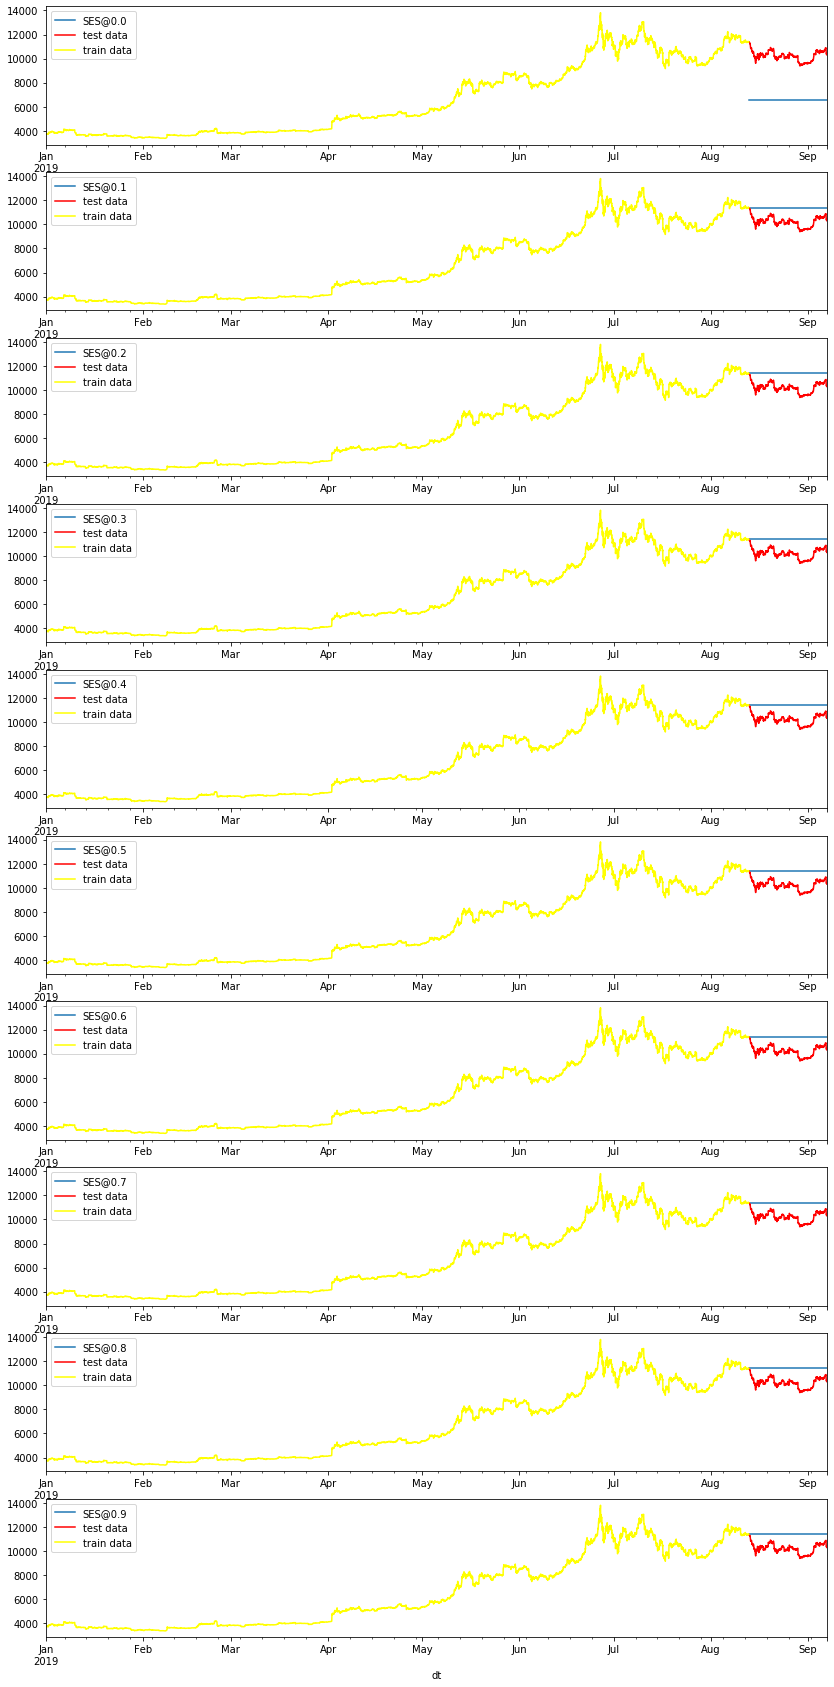

In [452]:
model = SES(train)

aic_dict = dict()
mse_dict = dict()
list_of_alphas = np.arange(0,1,0.1)
fig, ax = plt.subplots(10,1, figsize = (14,30)) # preparing the frame/grid to plot the data

for idx, alpha in enumerate(list_of_alphas):
    alpha = round(alpha,2)
    model_fitted = model.fit(alpha)
    forecasts = model_fitted.forecast(test.shape[0]) # forecasts for test set duration
    # plotting the data
    forecasts.plot(label = 'SES@'+str(alpha), ax = ax[idx]) # plotting the forecasts
    mse_dict[alpha] = mse(test, forecasts)
    aic_dict[alpha] = model_fitted.aic
    test.plot(label = 'test data', ax=ax[idx], color = 'red') # test dataset
    train.plot(label = 'train data', ax = ax[idx], color = 'yellow')
    ax[idx].legend()

In [458]:
# Choosing the best suited params
inv_dict = dict()
for i,j in mse_dict.items():
    inv_dict[j] = i
print("The best suited parameter for this data is :", inv_dict[sorted(inv_dict)[0]])

The best suited parameter for this data is : 0.1


In [462]:
print("The best parameters are: ")
for i in sorted(inv_dict):
    print(inv_dict[i])

The best parameters are: 
0.1
0.2
0.3
0.9
0.4
0.5
0.8
0.6
0.7
0.0


Upon examination of the different MSEs and the graphs, we see that there isn't much difference between the simple exponential smoothing curve for different parameters. We do observe though that the lowest MSE is at alpha = 0.1.

Thus we also AIC for each curve to further select the best curve.

In [453]:
# Choosing the best suited params using AIC
inv_dict = dict()
for i,j in aic_dict.items():
    inv_dict[j] = i
print("The best suited parameter for this data is :", inv_dict[sorted(inv_dict)[0]])

The best suited parameter for this data is : 0.9


#### Thus we see that alpha=0.9 gives the best AIC and at alpha = 0.9 even the MSE is the 4th best and so we go with alpha = 0.9.

In [464]:
model= SES(train)
ses_model = model.fit(0.9)

2) Holt's Linear trend 

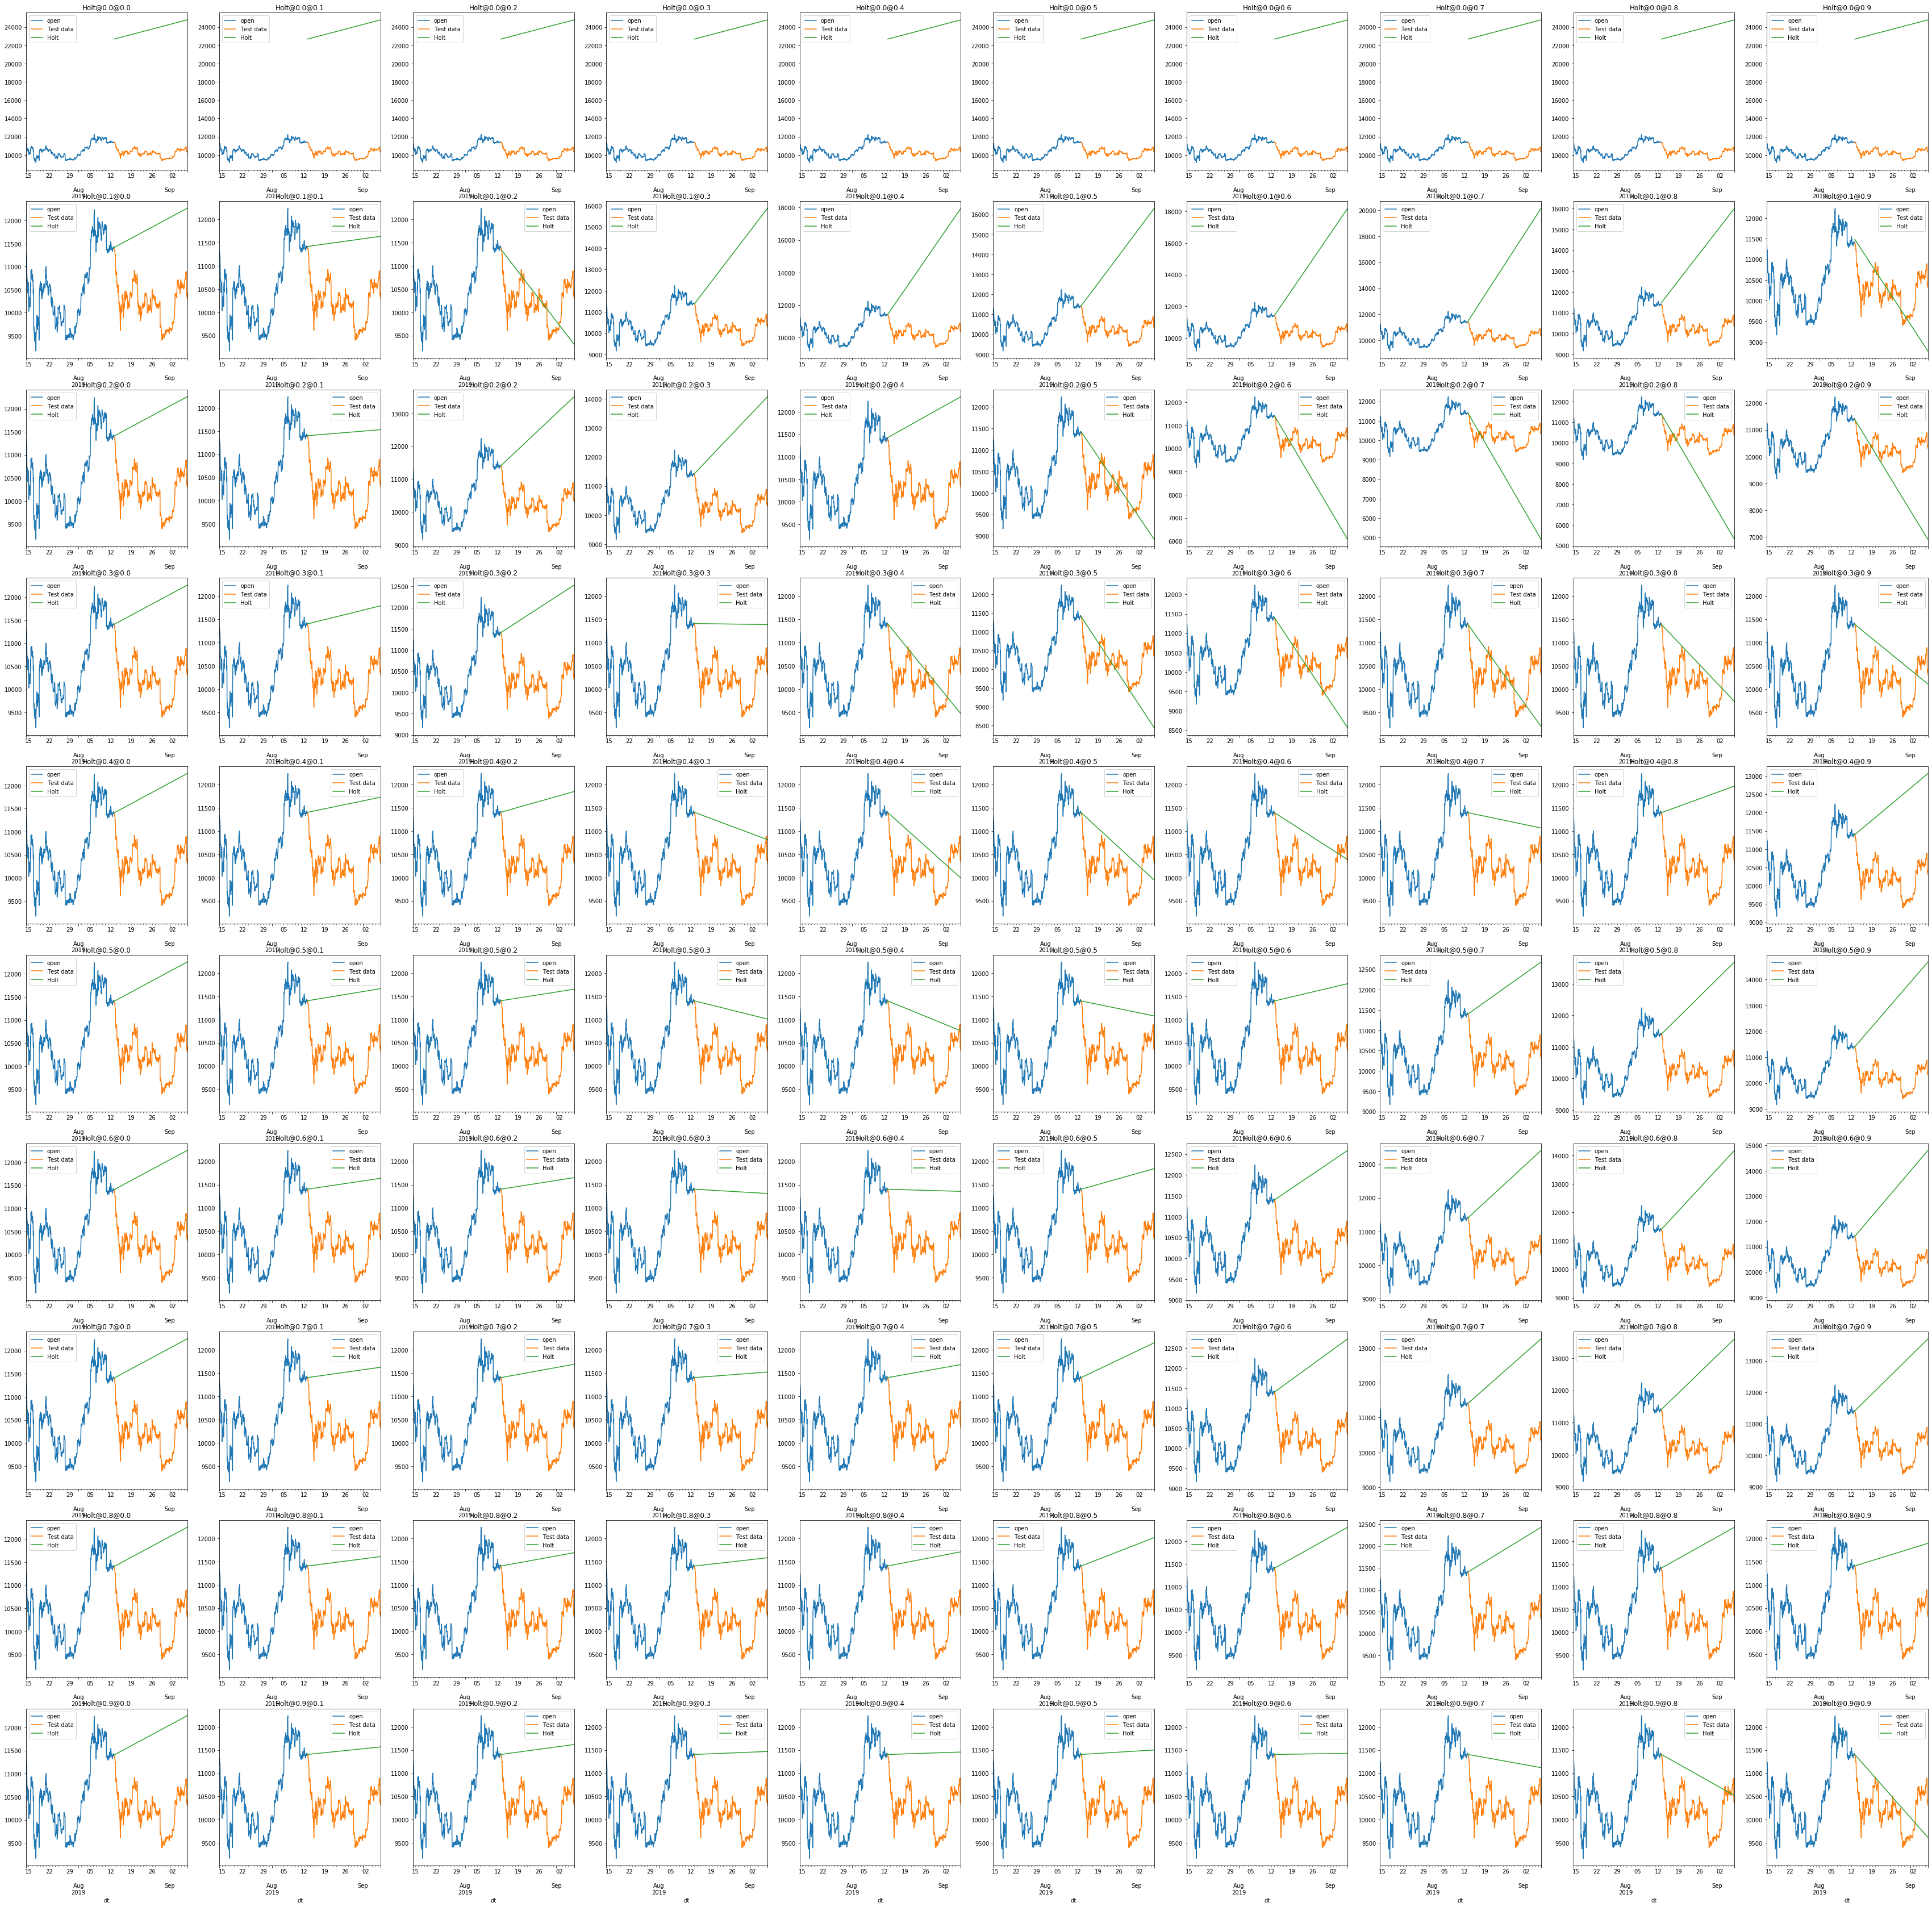

In [559]:
# without damping
model = Holt(train)
mse_dict = dict()

list_of_alphas = np.arange(0,1,0.1) # list of different values for the level smoothing parameter
list_of_betas = np.arange(0,1,0.1) # list of values for the trend smoothing parameter
fig, ax = plt.subplots(10, 10, figsize = (60,60)) # preparing the frame/grid to plot the data

for idx, alpha in enumerate(list_of_alphas):
    alpha = round(alpha, 1)
    for idx_b, beta in enumerate(list_of_betas):
        beta = round(beta, 1)
        model_fitted = model.fit(alpha, beta)
        forecasts = model_fitted.forecast(test.shape[0]) # forecast for test_n number of values
        # plotting the data
        train.iloc[-24*30:].plot(ax = ax[idx][idx_b]) # plot last month training data 
        test.plot(label = 'Test data', ax = ax[idx][idx_b])

        forecasts.plot(label = 'Holt', ax = ax[idx][idx_b]) # plotting the forecasts
        ax[idx][idx_b].set_title('Holt@'+str(alpha)+'@' + str(beta))
        ax[idx][idx_b].legend()
        mse_dict[str(alpha)+'_'+str(beta)] = mse(test, forecasts)

In [560]:
# Choosing the best suited params
inv_dict = dict()
for i,j in mse_dict.items():
    inv_dict[j] = i
print("The best suited parameter(alpha and beta) for this data is :", inv_dict[sorted(inv_dict)[0]])

The best suited parameter(alpha and beta) for this data is : 0.9_0.9


We see from the above graphs that most combinations don't catch the trend change very easily. The trend change being the change from an increasing to a decreasing trend from around mid of July. One of the combinations which has the lowest MSE is alpha = 0.9 and beta = 0.9 and this is the one we go with (It's clear from visual examination too).

Now we explore the damping parameter. The damping parameter is used very often with real life data. It is used to give a curve to the straight line which will slowly make the curved line into a straight line wihtout a slope after some time. This is used to represent real life data as in real life data a downward sloping line would mean that the opening price will infinitely as time goes on but a line with curve that slopes downwards and then tends to a straight line without a slope represents that it will settle around an opening price after moving decreasing for some time. After exploring a little, it was observed that the damping parameter, if between 0 and 0.98, doesn't really affect the curve.

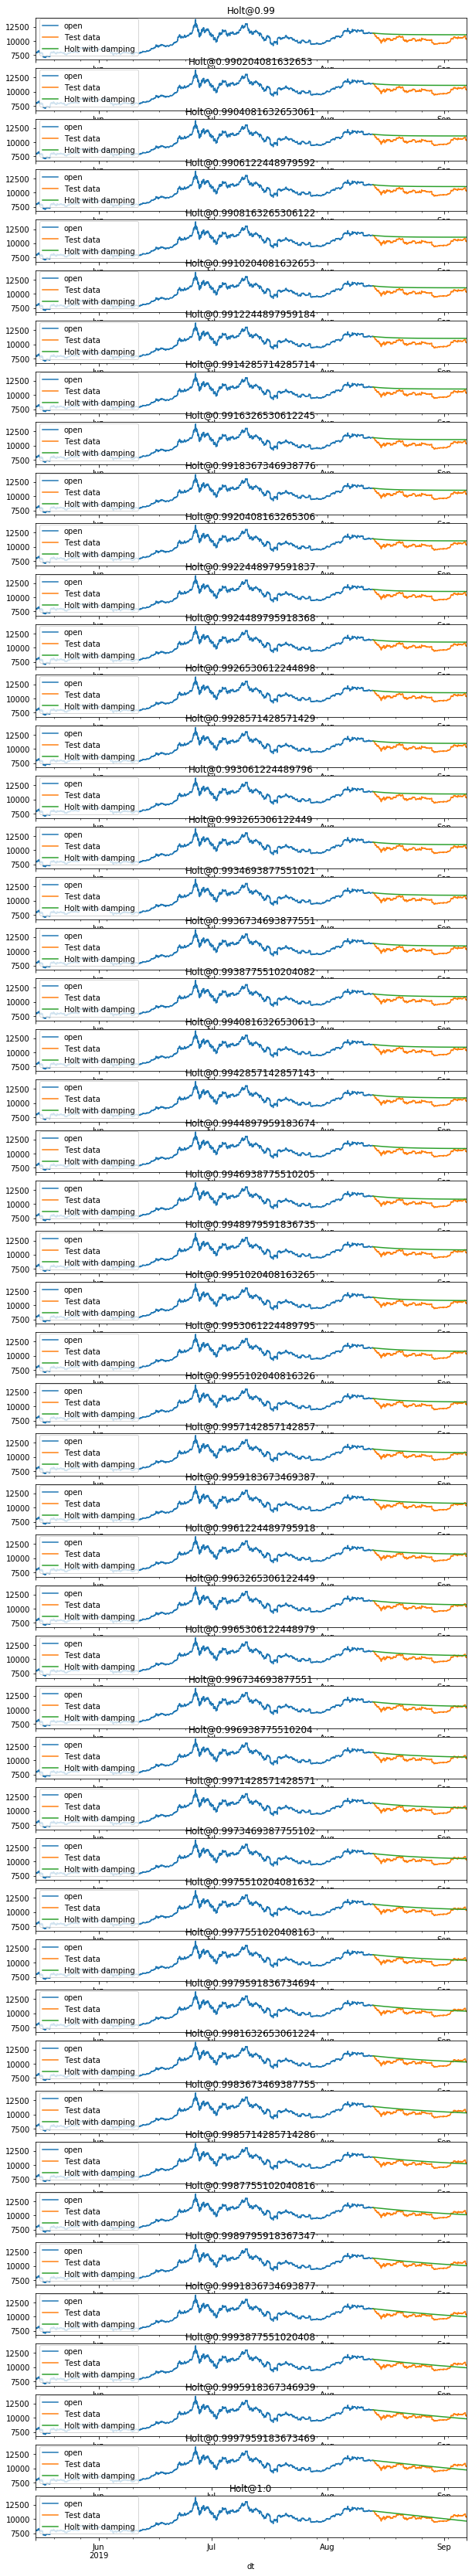

In [561]:
# with damping
model = Holt(train, damped=True)
mse_dict = dict()

fig, ax = plt.subplots(50, 1, figsize = (10,60)) # preparing the frame/grid to plot the data
list_of_damping = np.linspace(0.99,1)
for idx, damp in enumerate(list_of_damping):
    model_fitted = model.fit(0.9, 0.9, damp)
    forecasts = model_fitted.forecast(test.shape[0]) # forecasts for test value length
    # plotting the data
    train.iloc[-24*30*3:].plot(ax = ax[idx]) # last three months of training data
    test.plot(label = 'Test data', ax = ax[idx])
    
    forecasts.plot(label = 'Holt with damping', ax = ax[idx]) # plotting the forecasts
    ax[idx].set_title('Holt@'+str(damp))
    ax[idx].legend()
    mse_dict[damp] = mse(test, forecasts)

In [564]:
# Choosing the best suited damping param
inv_dict = dict()
for i,j in mse_dict.items():
    inv_dict[j] = i
print("The best suited damping parameter for this data is :", inv_dict[sorted(inv_dict)[0]])

The best suited damping parameter for this data is : 0.9995918367346939


In [563]:
mse_dict

{0.99: 1004196.2250782095,
 0.990204081632653: 996222.5788709815,
 0.9904081632653061: 988035.2204312668,
 0.9906122448979592: 979626.9843712373,
 0.9908163265306122: 970990.5077030507,
 0.9910204081632653: 962118.23765797,
 0.9912244897959184: 953002.4424838262,
 0.9914285714285714: 943635.2257784697,
 0.9916326530612245: 934008.5449923241,
 0.9918367346938776: 924114.23484621,
 0.9920408163265306: 913944.0365341767,
 0.9922448979591837: 903489.6337186017,
 0.9924489795918368: 892742.6964955416,
 0.9926530612244898: 881694.934700881,
 0.9928571428571429: 870338.1621509088,
 0.993061224489796: 858664.3736785365,
 0.993265306122449: 846665.837130901,
 0.9934693877551021: 834335.2028549005,
 0.9936734693877551: 821665.6336118157,
 0.9938775510204082: 808650.9583625733,
 0.9940816326530613: 795285.853925033,
 0.9942857142857143: 781566.059189628,
 0.9944897959183674: 767488.6273563694,
 0.9946938775510205: 753052.2225866888,
 0.9948979591836735: 738257.4685401217,
 0.9951020408163265: 723

We see that damping does make a lot of difference with the right coefficient. As we move from 0.99 to 1 we see that the curve starts becoming straighter and slants more and more downward and becomes less curvy. The MSE also reduces.Thus using MSE, the clear choice would be damping coefficient = 0.9995918367346939. But we feel that the downward slope would really quickly underestimate the actual values. If we use some damping and choose the curve via visual examination, it should show a more accuracte description of the data and will have less probability of underestimating the data.

Thus on visual inspection of the curves and inspection of the MSE, any damping coefficient between 0.9988 to 0.9996 seems to be a really good fit for the given data.

#### Final Model 

In [584]:
model = Holt(train, damped = True)
holt_model = model.fit(0.9,0.9, 0.99959)

3) ARIMA

To implement ARIMA we have written the below code so that it tries out a combination of different parameters and chooses the one with the lowest AIC. To see the difference between our models chosen by MSE and AIC, we will be running the below code again but will select the model with the best MSE.

It also runs an ADF test to check for stationarity of data being used.

#### ---> Based on AIC

In [616]:
def arima_output(df, split_ratio, col = None):
    df = df.sort_index()
    no_of_train_data_rows = int(len(df) * split_ratio)
    no_of_test_data_rows = int(len(df) * (1-split_ratio))
    train, test = df[:no_of_train_data_rows], df[no_of_train_data_rows:]
    
    X = train.values
    
    result = adfuller(X)
    print("ADF test for data without differencing: ")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')
    best_aic_value, best_order_value, best_mdl_value = _get_best_model(train, test)
    
    return best_aic_value, best_order_value, best_mdl_value,no_of_train_data_rows,no_of_test_data_rows
    

def _get_best_model(train, test):
    best_aic = np.inf
#     best_mse = np.inf
    best_order = None
    best_mdl = None

    pq_rng = range(0,5,1)
    d_rng = range(0,5,1) 
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(train, order=(i,d,j)).fit()
#                     forecasts = tmp_mdl.forecast(steps=n_testdata+1)[0]
#                     temp_mse = mse(test, forecasts)
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
#                     if temp_mse < best_mse:
                        best_aic = tmp_aic
#                         best_mse = temp_mse
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('AIC: {} | order: {}'.format(best_aic, best_order))                    
    
    return best_aic, best_order, best_mdl

data = pd.concat([train, test])
train_test_split_ratio = 0.90
best_aic_value, best_order_value, best_mdl_value,no_of_train_data_rows,no_of_test_data_rows = arima_output(data, train_test_split_ratio)
n_traindata= no_of_train_data_rows
n_testdata= no_of_test_data_rows
order= best_order_value

ADF test for data without differencing: 
ADF Statistic: -0.199969
p-value: 0.938525
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


AIC: 60976.927153413424 | order: (4, 2, 3)


#### We see via the ADF test on the original data that it isn't stationary (p-value>0.05).

#### We also get our final results best on the aic value.

In [618]:
train= data[:n_traindata]
test=data[n_traindata:]
train_value= np.array(train)
test_value= np.array(test)

model_arima = ARIMA(train_value,order=order)
model_arima_fit = model_arima.fit()

In [622]:
# ADF test for order of differenceing 2
d= train.shift(2)
data_diff= train - d
result = adfuller(data_diff.iloc[2:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

(-13.57285892714403, 2.197837674993037e-25, 31, 5345, {'1%': -3.431574030549211, '5%': -2.862080896827635, '10%': -2.567057918716162}, 60637.01037635378)
ADF Statistic: -13.572859
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The data has indeed become stationary.

Text(0.5, 1.0, 'Arima based on best AIC')

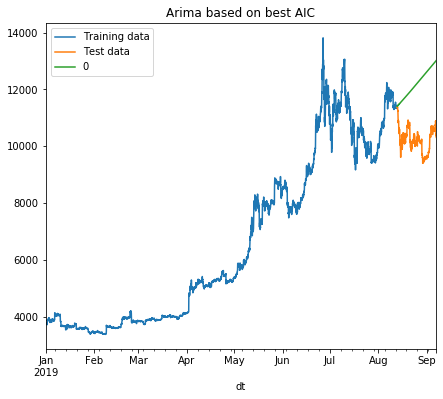

In [623]:
prediction = model_arima_fit.forecast(steps=n_testdata+1) [0]

fig, ax  =plt.subplots(1,1, figsize = (7,6))
train.plot(ax = ax, label = 'Training data')
test.plot(ax = ax, label ='Test data')
prediction = pd.DataFrame(data= prediction, index = test.index)
prediction.plot(label = "Predictions", ax = ax)
plt.legend()
plt.title('Arima based on best AIC')

#### ---> Based on MSE

In [628]:
def arima_output(df, split_ratio, col = None):
    df = df.sort_index()
    no_of_train_data_rows = int(len(df) * split_ratio)
    no_of_test_data_rows = int(len(df) * (1-split_ratio))
    train, test = df[:no_of_train_data_rows], df[no_of_train_data_rows:]
    
    X = train.values
    
    result = adfuller(X)
    print("ADF test for data without differencing: ")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')
    best_mse_value, best_order_value, best_mdl_value = _get_best_model(train, test)
    
    return best_mse_value, best_order_value, best_mdl_value,no_of_train_data_rows,no_of_test_data_rows
    

def _get_best_model(train, test):
    best_mse = np.inf
    best_order = None
    best_mdl = None

    pq_rng = range(0,5,1)
    d_rng = range(1,5,1) 
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(train, order=(i,d,j)).fit()
                    forecasts = tmp_mdl.forecast(steps=n_testdata+1)[0]
                    temp_mse = mse(test, forecasts)
                    if temp_mse < best_mse:
                        best_mse = temp_mse
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('MSE: {} | order: {}'.format(best_mse, best_order))                    
    
    return best_mse, best_order, best_mdl

data = pd.concat([train, test])
train_test_split_ratio = 0.90
best_mse_value, best_order_value, best_mdl_value,no_of_train_data_rows,no_of_test_data_rows = arima_output(data, train_test_split_ratio)
n_traindata= no_of_train_data_rows
n_testdata= no_of_test_data_rows
order= best_order_value

ADF test for data without differencing: 
ADF Statistic: -0.199969
p-value: 0.938525
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


MSE: 1267236.447200512 | order: (4, 2, 0)


In [629]:
train= data[:n_traindata]
test=data[n_traindata:]
train_value= np.array(train)
test_value= np.array(test)

model_arima = ARIMA(train_value,order=order)
model_arima_fit = model_arima.fit()

Text(0.5, 1.0, 'Arima based on best MSE')

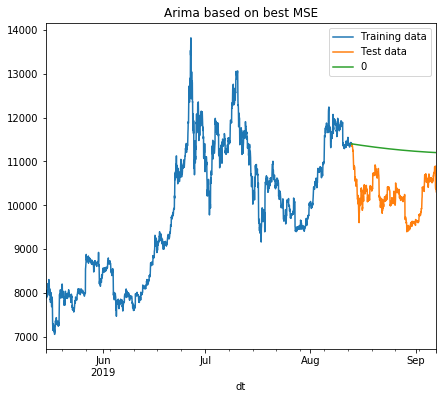

In [632]:
prediction = model_arima_fit.forecast(steps=n_testdata+1) [0]

fig, ax  =plt.subplots(1,1, figsize = (7,6))
train.iloc[-24*30*3:].plot(ax = ax, label = 'Training data')
test.plot(ax = ax, label ='Test data')
prediction = pd.DataFrame(data= prediction, index = test.index)
prediction.plot(label = "Predictions", ax = ax)
plt.legend()
plt.title('Arima based on best MSE')

The differences between between both the models chosen are really obvious but interesting too. The model with lowest mse naturally is a better fit for our test data but the model with minimum aic was best 

****

## -> <u> Machine Learning Models </u>

For the various ML models what we do is we build some features using the date time index such as:
day, hour, month etc.

Then we will feed these features into the model and evaluate on the test dataset.

#### Making Features

In [15]:
data = pd.concat([train, test])

In [16]:
ml = data.copy()
ml = pd.DataFrame(ml).reset_index()

In [17]:
ml['hour'] = ml.dt.apply(lambda x: x.hour)
ml['day'] = ml.dt.apply(lambda x: x.day)
ml['week'] = ml.dt.apply(lambda x: x.week)
ml['month'] = ml.dt.apply(lambda x: x.month)
ml['weekday'] = ml.dt.apply(lambda x: x.weekday())
ml.set_index('dt', inplace= True)

In [18]:
train_ml = ml.iloc[:train.shape[0], :]
test_ml = ml.iloc[train.shape[0]:,]

In [20]:
x_train = train_ml.drop(['open'], axis = 1)
x_test = test_ml.drop(['open'], axis = 1)
y_train = train_ml.open
y_test = test_ml.open

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

1. Random Forest Regressor

Text(0.5, 1.0, 'RFC')

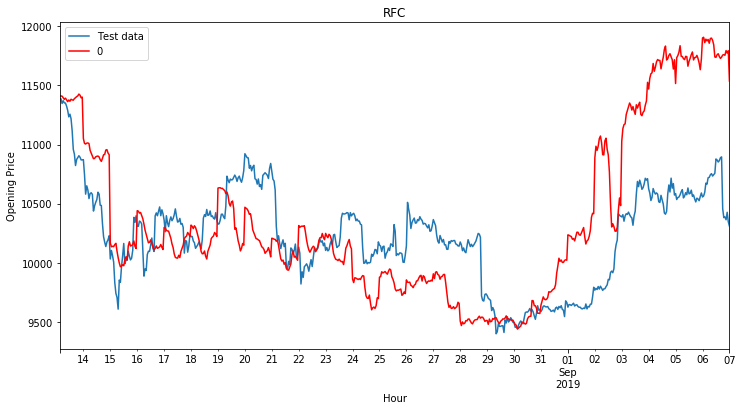

In [38]:
rfc = RandomForestRegressor()

rfc.fit(x_train_scaled, y_train)
preds = rfc.predict(x_test_scaled)

mse_rfc = mse(y_test, preds)

fig, ax = plt.subplots(1, 1, figsize = (12,6))
y_test.plot(ax = ax, label = 'Test data')
pd.DataFrame(preds, index = test_ml.index).plot(ax = ax, color = 'red',alpha = 1 ,label = 'Prediction')
ax.legend()
ax.set_xlabel('Hour')
ax.set_ylabel('Opening Price')
ax.set_title('RFC')

2. Support Vector Regressor

Text(0.5, 1.0, 'SVR')

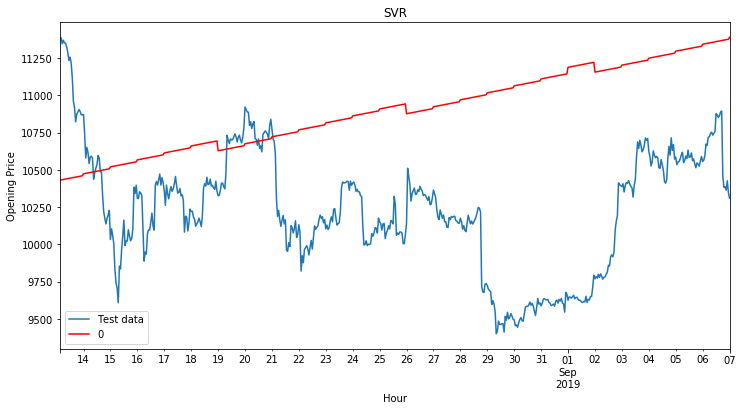

In [43]:
svr = SVR(kernel = 'linear')

svr.fit(x_train_scaled, y_train)

preds = svr.predict(x_test_scaled)

mse_svr = mse(y_test, preds)

fig, ax = plt.subplots(1, 1, figsize = (12,6))
y_test.plot(ax = ax, label = 'Test data')
pd.DataFrame(preds, index = test_ml.index).plot(ax = ax, color = 'red',alpha = 1 ,label = 'Prediction')
ax.legend()
ax.set_xlabel('Hour')
ax.set_ylabel('Opening Price')
ax.set_title('SVR')

-----

### Rough

Notes: 
1. Clean up trend section
2. Make functions for straight line, parabolic and modified exponential as they are getting used again and again
3. All functions using log are giving Nans when y_t = 0 being included. Fix this
4. Make function for selecting best value of moving average period
5. Add seasonality for different time periods : day, month, year etc. 
6. Check subset = False : Link relative
7. Under cyclic component estimation, see what window for moving average to be used.
8. Add asfreq parameter for all methods
9. Use seasonal_decompose method fo statsmodels
10. Check if we need to use either log or box cox or some other TRANSFORMATION OR THE DICKY-FULLER test to make thhe data stationary before working on it
11. data_subset.resample('M').mean() to convert data into monthly data 


TO DO :
2. Use past data for checking cyclic nature
3. Explain intuitively the maning of different params in context of what we have done
4. Change alpha beta wherever written to slope coefficient , damping coeff etc
5. Reason for why we don't choose aic
6. Arima differences and analysis complete
7. PLot different MSE for holt model
8. Grid search for ML model
9. Write down : A few other stuff that I really wanted to try out were:
    * Using only trend or detrended data to forecast
    * Use of cross validation

TODO Medium:
1. Add github links at top and bootom and wherever : "can be found here"
2. Bold all important words and links
3. Second degree fitted to logarithm link
4. Go through all methods and describe any if needed
5. Complete cyclicity if needed
6. Specify additive or mult model before seasonality
7. Go through seasonality after cyclic implementation
8. Seasonality methods hyper link attach 

****